Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
1


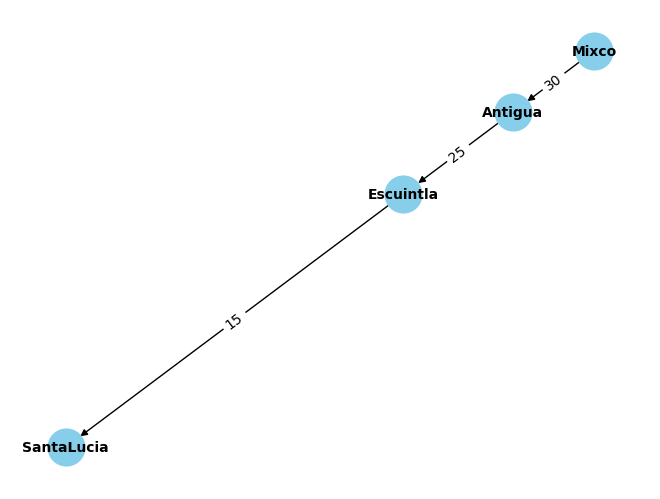

Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
2
Ingrese ciudad origen:
Mixco
Ingrese ciudad destino:
SantaLucia
Ruta más corta: Mixco -> Antigua -> Escuintla -> SantaLucia
Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
4
1. Interrupción de tráfico
2. Establecer conexión
1
Ingrese ciudad1:
Antigua
Ingrese ciudad2:
Escuintla
Tráfico interrumpido entre Antigua y Escuintla
Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
1


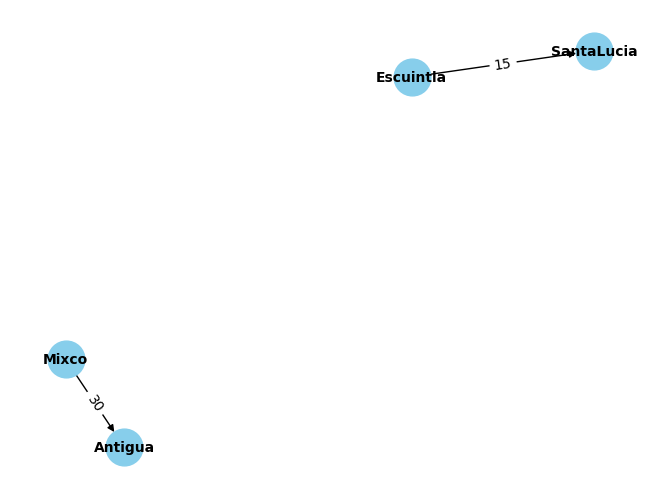

Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
4
1. Interrupción de tráfico
2. Establecer conexión
2
Ingrese ciudad1:
Antigua
Ingrese ciudad2:
SantaLucia
Ingrese distancia:
80
Conexión establecida entre Antigua y SantaLucia con una distancia de 80 KM
Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
1


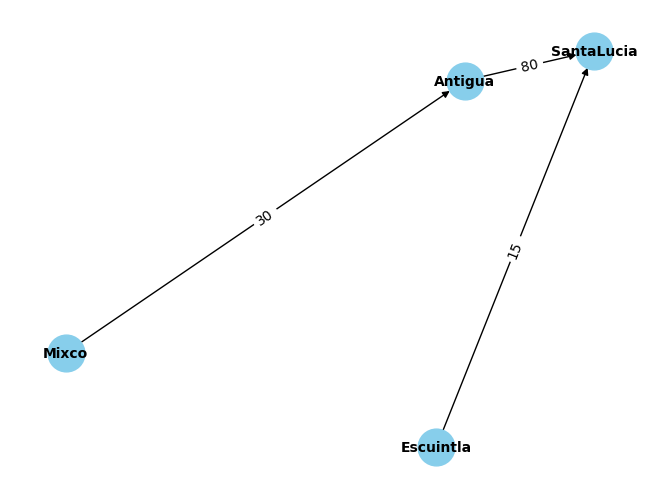

Menu:
1. Mostrar grafo
2. Ruta más corta
3. Ciudad centro del grafo
4. Modificar grafo
5. Salir
5


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def load_graph(filename):
    G = nx.DiGraph()
    with open(filename, 'r') as file:
        for line in file:
            city1, city2, distance = line.split()
            distance = int(distance)
            G.add_edge(city1, city2, weight=distance)
    return G

def floyd_warshall(G):
    predecessors, distances = nx.floyd_warshall_predecessor_and_distance(G)
    return predecessors, distances

def get_shortest_path(predecessors, source, target):
    if source not in predecessors or target not in predecessors[source]:
        return "No path"
    path_list = []
    current = target
    while current != source:
        if current not in predecessors[source]:
            return "No path"
        path_list.append(current)
        current = predecessors[source][current]
    path_list.append(source)
    return " -> ".join(reversed(path_list))

def get_center(G):
    lengths = dict(nx.floyd_warshall(G))
    min_max_distance = float('inf')
    center = None
    for node in lengths:
        max_distance = max(lengths[node].values())
        if max_distance < min_max_distance:
            min_max_distance = max_distance
            center = node
    return center

def draw_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def main():
    G = load_graph("guategrafo.txt")
    predecessors, distances = floyd_warshall(G)
    while True:
        print("Menu:")
        print("1. Mostrar grafo")
        print("2. Ruta más corta")
        print("3. Ciudad centro del grafo")
        print("4. Modificar grafo")
        print("5. Salir")
        option = int(input())

        if option == 1:
            draw_graph(G)
        elif option == 2:
            print("Ingrese ciudad origen:")
            city1 = input().strip()
            print("Ingrese ciudad destino:")
            city2 = input().strip()
            path = get_shortest_path(predecessors, city1, city2)
            if path == "No path":
                print("No hay ruta disponible entre las ciudades dadas.")
            else:
                print(f"Ruta más corta: {path}")
        elif option == 3:
            center = get_center(G)
            print(f"Ciudad centro del grafo: {center}")
        elif option == 4:
            print("1. Interrupción de tráfico")
            print("2. Establecer conexión")
            sub_option = int(input())
            if sub_option == 1:
                print("Ingrese ciudad1:")
                city1 = input().strip()
                print("Ingrese ciudad2:")
                city2 = input().strip()
                if G.has_edge(city1, city2):
                    G.remove_edge(city1, city2)
                    print(f"Tráfico interrumpido entre {city1} y {city2}")
                else:
                    print(f"No existe una conexión directa entre {city1} y {city2}")
            elif sub_option == 2:
                print("Ingrese ciudad1:")
                city1 = input().strip()
                print("Ingrese ciudad2:")
                city2 = input().strip()
                print("Ingrese distancia:")
                distance = int(input())
                G.add_edge(city1, city2, weight=distance)
                print(f"Conexión establecida entre {city1} y {city2} con una distancia de {distance} KM")
            predecessors, distances = floyd_warshall(G)
        elif option == 5:
            break

if __name__ == "__main__":
    main()
